<a href="https://colab.research.google.com/github/veritaem/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/Copy_of_LS_DS_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = np.array([[1], [1], [1], [0]])

In [0]:
##### Your Code Here #####
class Perceptron:
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter
  def fit(self, X, y):
    self.weight = np.zeros(1 + X.shape[1])
    self.errors = []
    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self
  def net_input(self, X):
    return np.dot(X, self.weight[1:]) + self.weight[0]
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1.0, 0)
        
      

[0.2 0.  0. ]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


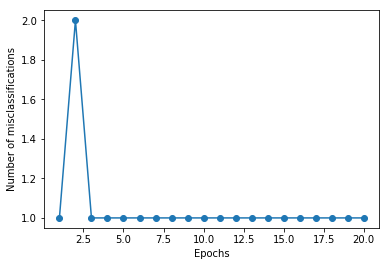

In [0]:
p1 = Perceptron(.1, 20)
p1.fit(X, y)
print(p1.weight)
print(p1.errors)

plt.plot(range(1, len(p1.errors) + 1), p1.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


In [0]:
class Pergeptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    self.weight = np.zeros(1 + X.shape[1])
    self.errors = []  # Number of misclassifications
    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

[0.2 0.  0. ]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


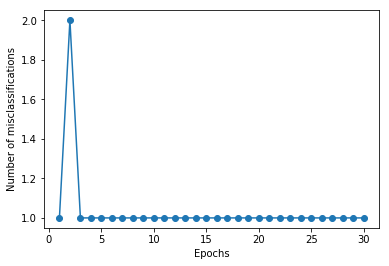

In [0]:
pn = Pergeptron(0.1, 30)

pn.fit(X, y)
print(pn.weight)
print(pn.errors)

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
##### Your Code Here #####
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
df.shape

(891, 16)

In [0]:
X = df.drop(['survived', 'Unnamed: 0', 'embarked', 'who', 'adult_male',
                     'deck', 'embark_town', 'alive', 'alone'], axis = 1)
X.sex.replace({'male':0, 'female':0}, inplace=True)
X['class'].replace({'First': 1, 'Second': 2, 'Third': 3}, inplace=True)
values = {'age': np.mean(df.age)}
X.fillna(value = values, inplace=True)
X.fillna(method = 'ffill', inplace= True)
y = np.array(df.survived)
X = np.array(X)
X, y

(array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
          7.25      ,  3.        ],
        [ 1.        ,  0.        , 38.        , ...,  0.        ,
         71.2833    ,  1.        ],
        [ 3.        ,  0.        , 26.        , ...,  0.        ,
          7.925     ,  3.        ],
        ...,
        [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
         23.45      ,  3.        ],
        [ 1.        ,  0.        , 26.        , ...,  0.        ,
         30.        ,  1.        ],
        [ 3.        ,  0.        , 32.        , ...,  0.        ,
          7.75      ,  3.        ]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
   

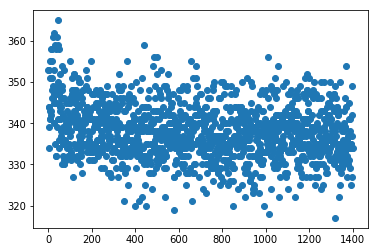

In [0]:
p2 = Perceptron(.001, 1400)
p2.fit(X, y)
plt.plot(range(1, len(p2.errors)+1), p2.errors, 'o')

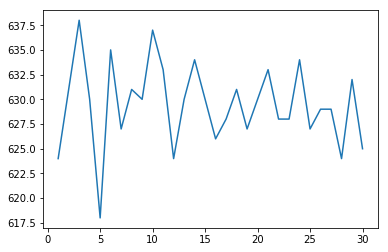

In [0]:
plt.plot(range(1, len(p2.errors)+1), p2.errors)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?